# TITANIC SURVIVAL PREDICTION
task 1 - internship project - codsoft

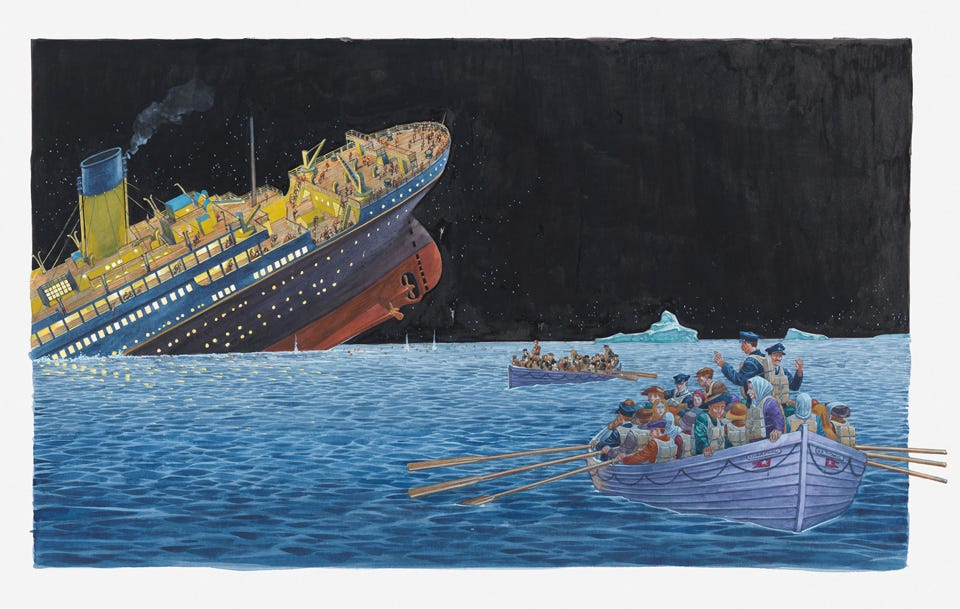

**IMPORT LIBRARIES**


In [192]:
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**IMPORT DATA**

In [193]:
data = pd.read_csv('/content/tested[1].csv')


In [194]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [195]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**SUMMARY STATISTICS**

In [196]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [198]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [199]:
data.shape

(418, 12)

**HANDLING THE MISSING DATA**

In [200]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [201]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

`CABIN CONTAIN 327 MISSING DATA , SO WE REMOVE THE CABIN COLUMN

`AGE CANNOT BE REMOVED , S0 GENERATE 86 RANDOM VARIABLE BY MEAN OF THE DATA

In [202]:
data.drop(columns=['Cabin'],inplace=True)

In [203]:
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [204]:
test_age = np.random.randint(data['Age'].mean() - data['Age'].std(), data['Age'].mean() + data['Age'].std(), 86)

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [206]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [207]:
test_age = np.random.randint(data['Age'].mean() - data['Age'].std(), data['Age'].mean() + data['Age'].std(), 86)

In [208]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [209]:
data['Age'][data['Age'].isnull()] = test_age

<ipython-input-209-09d89b2ba897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'][data['Age'].isnull()] = test_age


In [210]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [211]:
data.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

**DATA ENCODING**

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [213]:
import pandas as pd

# Assuming 'data' is your DataFrame
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])


In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Sex_female   418 non-null    uint8  
 10  Sex_male     418 non-null    uint8  
 11  Embarked_C   418 non-null    uint8  
 12  Embarked_Q   418 non-null    uint8  
 13  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(5)
memory usage: 31.6+ KB


**DATA VISUALISATION**

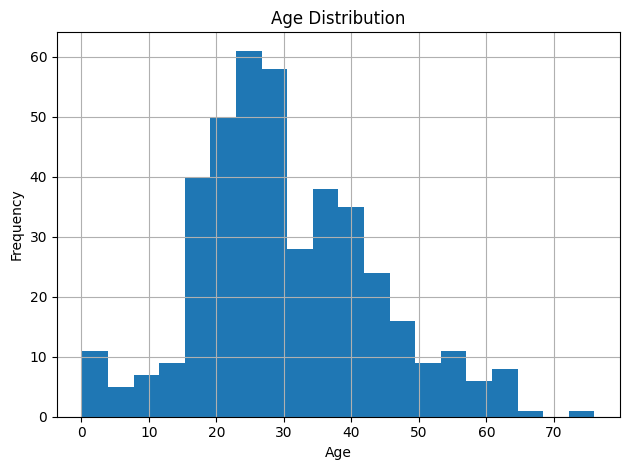

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram for Age Distribution
plt.hist(data['Age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


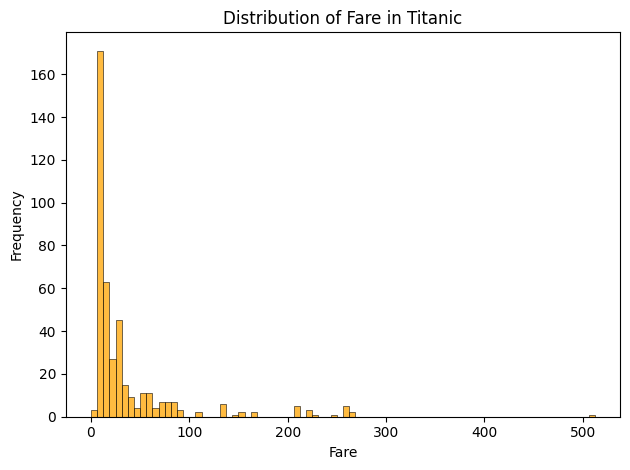

In [216]:

# Plotting histogram for Distribution of Fare in Titanic
sns.histplot(data=data, x='Fare', color='orange')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare in Titanic')
plt.tight_layout()
plt.show()



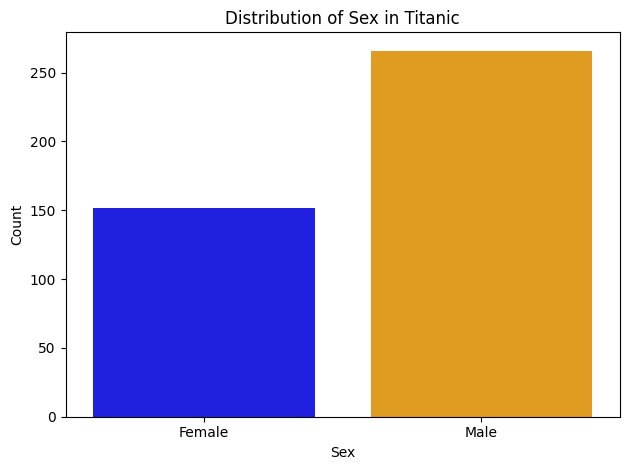

In [217]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the one-hot encoded 'Sex' columns
sex_data = data[['Sex_female', 'Sex_male']]

# Calculate the count of females and males
female_count = sex_data['Sex_female'].sum()
male_count = sex_data['Sex_male'].sum()

# Create a bar plot to visualize the distribution of Sex
sns.barplot(x=['Female', 'Male'], y=[female_count, male_count], palette=["blue", "orange"])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in Titanic')
plt.tight_layout()
plt.show()



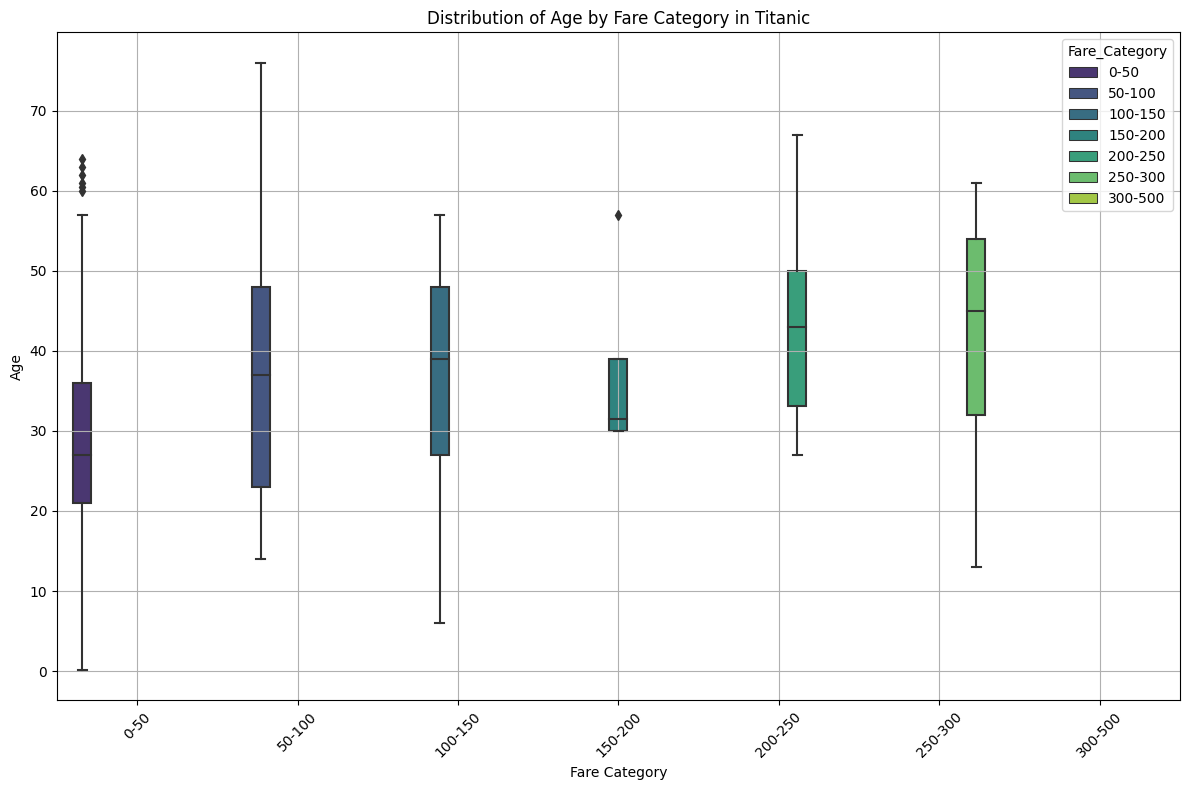

In [218]:


# Creating a box plot for Distribution of Age by Fare in Titanic

# Create Fare categories
bins = [0, 50, 100, 150, 200, 250, 300, 500]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-500']
data['Fare_Category'] = pd.cut(data['Fare'], bins=bins, labels=labels)

plt.figure(figsize=(12, 8))

sns.boxplot(x='Fare_Category', y='Age', data=data, hue='Fare_Category', palette='viridis')
plt.xlabel('Fare Category')
plt.ylabel('Age')
plt.title('Distribution of Age by Fare Category in Titanic')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines if needed
plt.tight_layout()
plt.show()



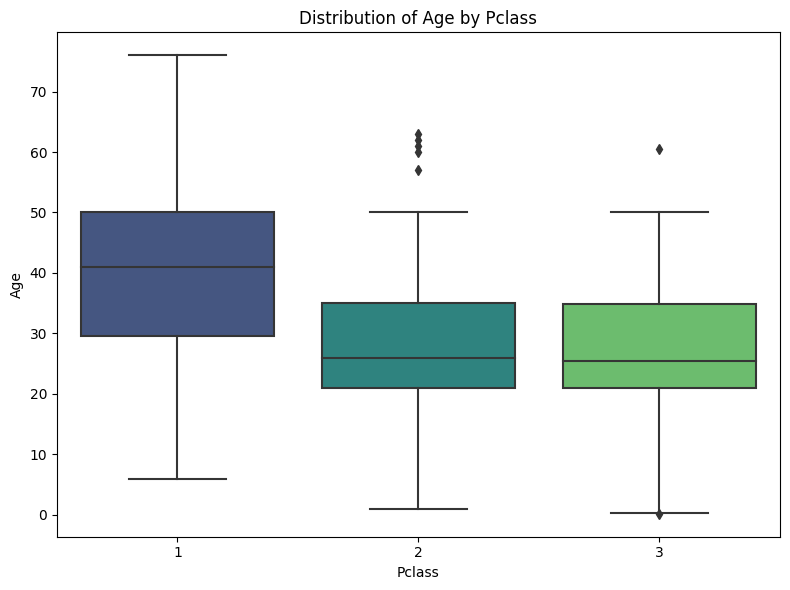

In [219]:



# Boxplot of Age by Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Age', palette='viridis')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Distribution of Age by Pclass')
plt.tight_layout()
plt.show()



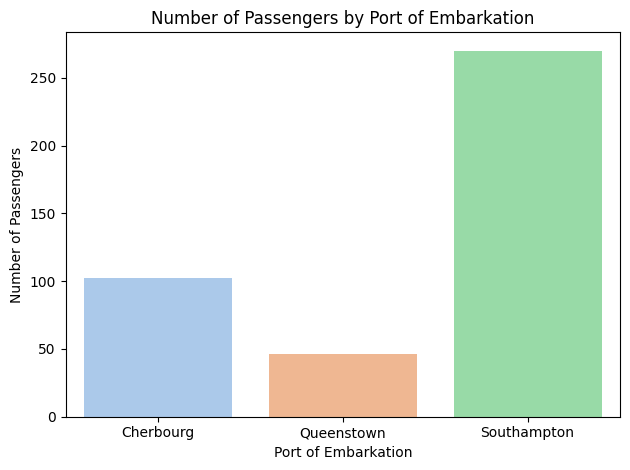

In [220]:
# Calculate the counts of passengers for each port
cherbourg_count = data['Embarked_C'].sum()
queenstown_count = data['Embarked_Q'].sum()
southampton_count = data['Embarked_S'].sum()

# Create a bar plot
sns.barplot(x=['Cherbourg', 'Queenstown', 'Southampton'], y=[cherbourg_count, queenstown_count, southampton_count], palette='pastel')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Port of Embarkation')
plt.tight_layout()
plt.show()


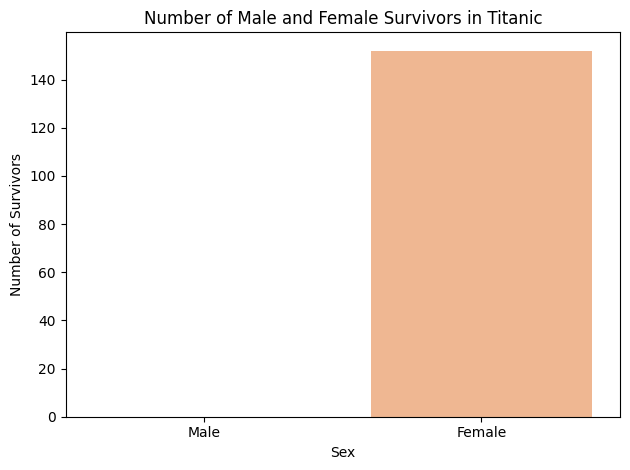

In [221]:
# Calculate the number of male and female survivors
male_survivors = data[data['Sex_male'] == 1]['Survived'].sum()
female_survivors = data[data['Sex_female'] == 1]['Survived'].sum()

# Create a bar plot
sns.barplot(x=['Male', 'Female'], y=[male_survivors, female_survivors], palette='pastel')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.title('Number of Male and Female Survivors in Titanic')
plt.tight_layout()
plt.show()


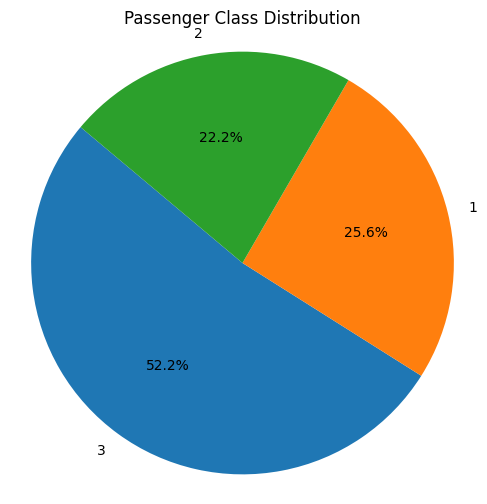

In [222]:
import matplotlib.pyplot as plt

# Count the number of passengers in each class
class_counts = data['Pclass'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Passenger Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the pie chart
plt.show()



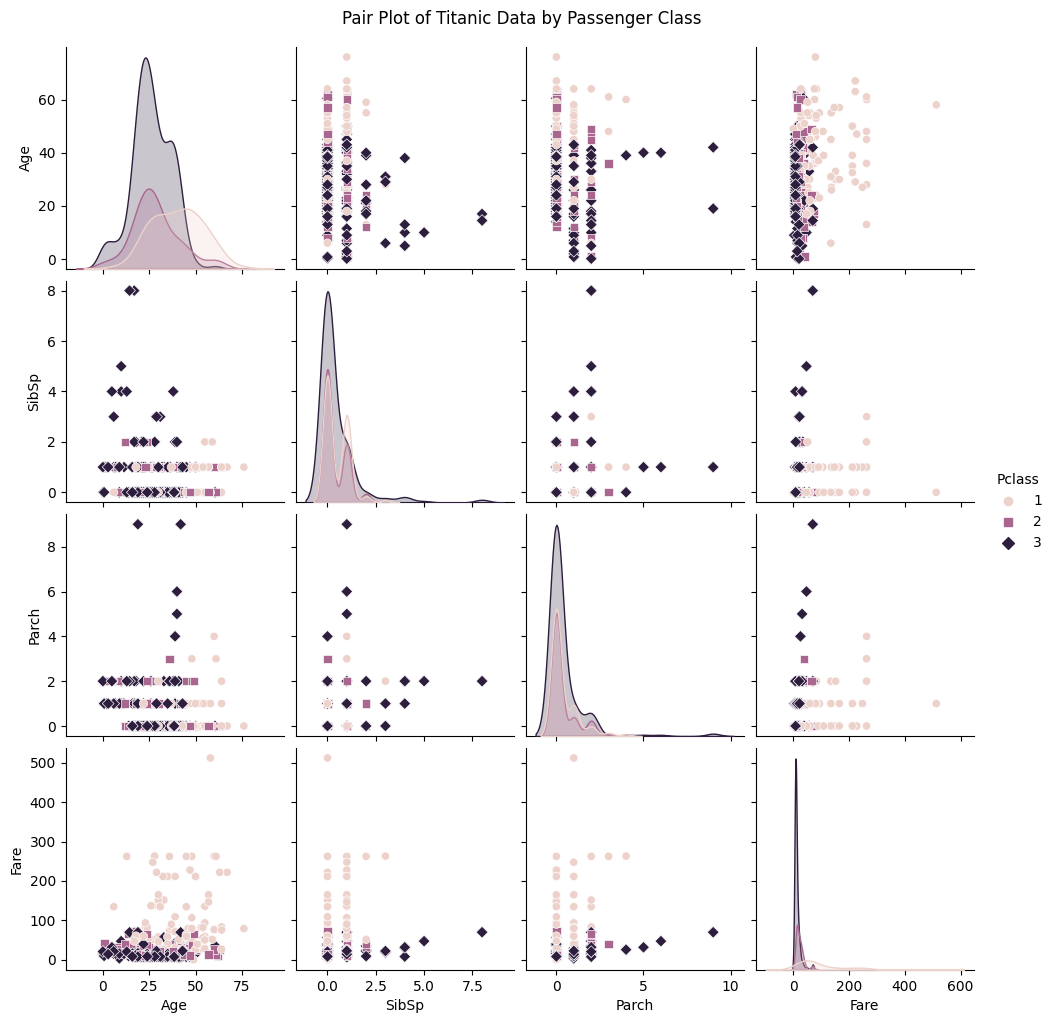

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Select a subset of columns you want to include in the pair plot
columns_to_include = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

# Create a pair plot
sns.pairplot(data[columns_to_include], diag_kind='kde', hue='Pclass', markers=['o', 's', 'D'])

# Add a title to the pair plot
plt.suptitle('Pair Plot of Titanic Data by Passenger Class', y=1.02)

# Show the pair plot
plt.show()


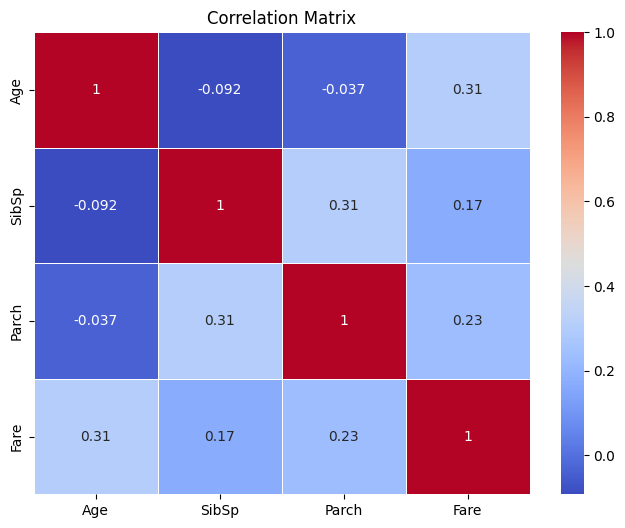

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Select the numerical columns for correlation analysis
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


-**SPLITING THE DATA**



-**MODELING THE DATA**

-

Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 34]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



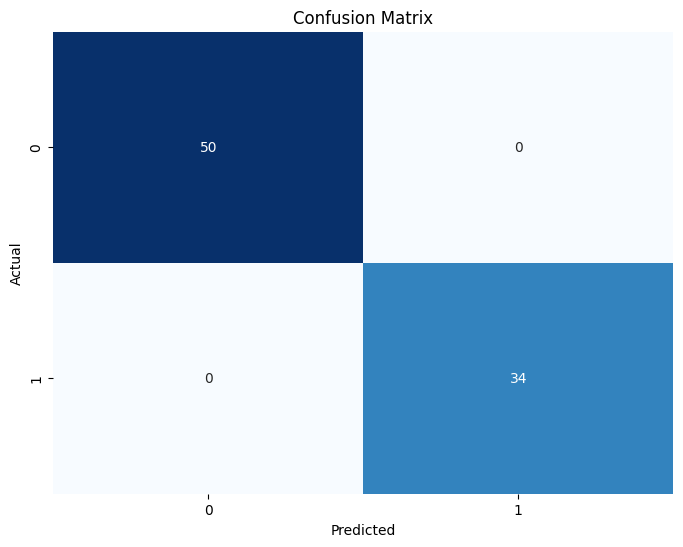

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define your features (X) and target (y)
X = data[['Age', 'Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion_mat}')
print(f'Classification Report:\n{classification_rep}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**MODEL ACCURACY **

In [226]:
from sklearn.metrics import accuracy_score



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


**CROSS VALIDATION**

In [227]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable

# Create a logistic regression model
logistic_model = LogisticRegression()

# Perform 5-fold cross-validation (you can adjust the number of folds with the 'cv' parameter)
cross_val_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0
